**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab29](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab30/Lab30-TH.ipynb)

___

# <font color=darkblue>Laboratory 30: Exponential, Logarithmic, Power-Law Models </font>

**Medrano, Giovanni**

**R11521018**


ENGR 1330 Exercise 30 - Homework

___


## Exercise 1

The following data are the temperature as a function of vertical depth in a chemically active settling pond. 

|Depth (cm)|Temp ($^o$C)|
|---:|---:|
|0.1|21.2|
|0.8|27.3|
|3.6|31.8|
|12| 35.6|
|120 | 42.3|
|390 | 45.9|
|710 | 47.7|
|1200| 49.2|
|1800| 50.5|
|2400| 51.4|

Fit the following data models.

1. Linear data model
2. Exponential data model
3. Logarithmic data model
4. Power-law model

Produce a plot of the data and data model for each model (4 plots)

Select the "best" model based on the $R^2$ value. 

Use the best model to predict the temperature at 1 meter and 2 meters depth.



In [70]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

df=pd.read_csv('lab30.csv')
df

,Depth,Temp
0,0.1,21.2
1,0.8,27.3
2,3.6,31.8
3,12.0,35.6
4,120.0,42.3
5,390.0,45.9
6,710.0,47.7
7,1200.0,49.2
8,1800.0,50.5
9,2400.0,51.4


In [71]:
df.describe()

,Depth,Temp
count,10.000000,10.000000
mean,663.650000,40.290000
std,863.226788,10.670463
min,0.100000,21.200000
25%,5.700000,32.750000
50%,255.000000,44.100000
75%,1077.500000,48.825000
max,2400.000000,51.400000


[0.1, 0.8, 3.6, 12.0, 120.0, 390.0, 710.0, 1200.0, 1800.0, 2400.0]
[21.2, 27.3, 31.8, 35.6, 42.3, 45.9, 47.7, 49.2, 50.5, 51.4]
<class 'pandas.core.frame.DataFrame'>
The r-squared is 0.5835120068643358


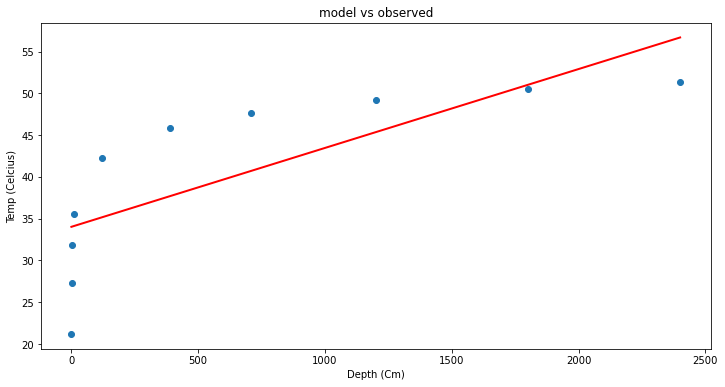

In [82]:
# build the data lists
# build a dataframe
depth = df['Depth'].tolist()
print(depth)
temp = df['Temp'].tolist()
print(temp)
df = pd.DataFrame({'Depth':depth, 'Temp':temp})
df
print(type(df))
# Initialise and fit a linear regression model using `statsmodels`
model = smf.ols('Temp ~ Depth', data = df)
model = model.fit()
model.params
# Predict values
rsl = model.rsquared
print('The r-squared is',rsl)
yP = model.predict()

# Plot regression against actual data
plt.figure(figsize = (12, 6))
plt.xlabel('Depth (Cm)')
plt.ylabel('Temp (Celcius)')
plt.plot(df['Depth'], df['Temp'], 'o')
plt.plot(df['Depth'], yP, 'r', linewidth = 2)
plt.title('model vs observed')
plt.show()

In [84]:
# build the data lists
# build a dataframe
df['DDepth'] = df['Depth']** 2
df


,Depth,Temp,DDepth
0,0.1,21.2,0.01
1,0.8,27.3,0.64
2,3.6,31.8,12.96
3,12.0,35.6,144.00
4,120.0,42.3,14400.00
5,390.0,45.9,152100.00
6,710.0,47.7,504100.00
7,1200.0,49.2,1440000.00
8,1800.0,50.5,3240000.00
9,2400.0,51.4,5760000.00


The r-squared is 0.7582707849296989


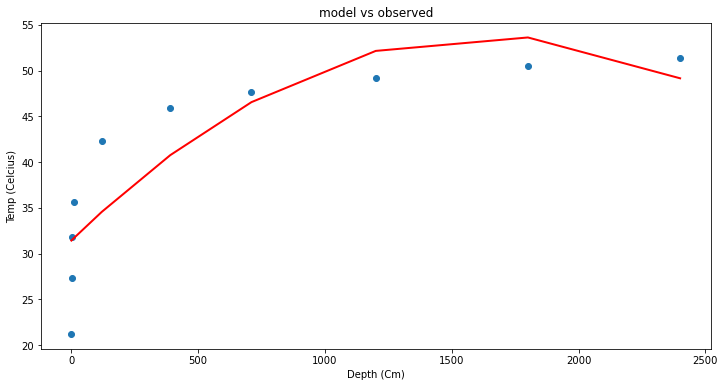

In [85]:
model = smf.ols('Temp ~ Depth + DDepth', data = df)
model = model.fit()
model.params
# Initialise and fit an exponential regression model using `statsmodels`
rsl1 = model.rsquared
print('The r-squared is',rsl1)
yP = model.predict()

# Predict values
yP = model.predict()
# Plot regression against actual data
plt.figure(figsize = (12, 6))
plt.xlabel('Depth (Cm)')
plt.ylabel('Temp (Celcius)')
plt.plot(df['Depth'], df['Temp'], 'o')
plt.plot(df['Depth'], yP, 'r', linewidth =2)

plt.title('model vs observed')
plt.show()


In [86]:
# build the data lists
dfd=pd.read_csv('lab30.csv')
dfd

,Depth,Temp
0,0.1,21.2
1,0.8,27.3
2,3.6,31.8
3,12.0,35.6
4,120.0,42.3
5,390.0,45.9
6,710.0,47.7
7,1200.0,49.2
8,1800.0,50.5
9,2400.0,51.4


[0.1, 0.8, 3.6, 12.0, 120.0, 390.0, 710.0, 1200.0, 1800.0, 2400.0]
[21.2, 27.3, 31.8, 35.6, 42.3, 45.9, 47.7, 49.2, 50.5, 51.4]
<class 'pandas.core.frame.DataFrame'>
The R-squared is: 0.5835120068643358


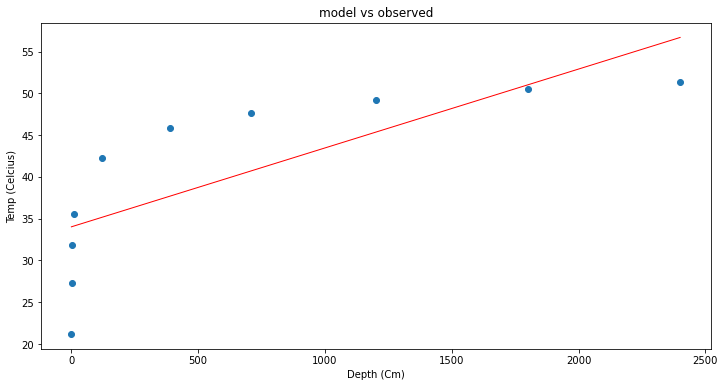

In [87]:
# build a dataframe
depth = dfd['Depth'].tolist()
print(depth)
temp = dfd['Temp'].tolist()
print(temp)
dfd = pd.DataFrame({'Depth':depth, 'Temp':temp})
dfd
print(type(dfd))
# Initialise and fit a linear regression model using `statsmodels`
model = smf.ols('Temp ~ Depth', data = dfd)
model = model.fit()
yppp= model.predict()
# Predict values

b0 = model.params[0]
b1 = model.params[1]
s = model.ssr
rsqE = model.rsquared
print('The R-squared is:', rsqE)
# Plot regression against actual data
plt.figure(figsize = (12, 6))
plt.xlabel('Depth (Cm)')
plt.ylabel('Temp (Celcius)')
plt.plot(dfd['Depth'], dfd['Temp'], 'o')
plt.plot(dfd['Depth'], yppp, 'r', linewidth = 1)
plt.title('model vs observed')
plt.show()

[0.1, 0.8, 3.6, 12.0, 120.0, 390.0, 710.0, 1200.0, 1800.0, 2400.0]
The rSquared value is: 0.9867519774371926


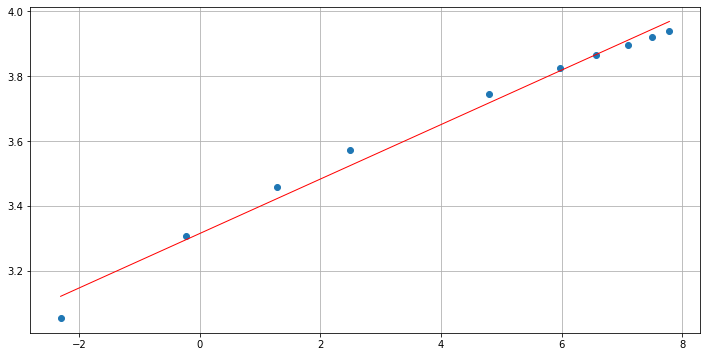

In [96]:
# build the data lists
# build a dataframe
from matplotlib import pyplot as plt
dfdd=pd.read_csv('lab30.csv')
dfdd
depth = dfdd['Depth'].tolist()
print(depth)
temp = dfdd['Temp'].tolist()
dfdd = pd.DataFrame({'Depth':depth, 'Temp':temp})
dfdd['lnDepth'] = dfdd['Depth'].apply(math.log)
dfdd['lnTemp'] = dfdd['Temp'].apply(math.log)
dfdd
# Initialise and fit a power-law regression model using `statsmodels`
modelplaw = smf.ols('lnTemp ~ lnDepth', data= dfdd)
modelplaw = modelplaw.fit()
# Predict values
yP = modelplaw.predict()

b0 = modelplaw.params[0]
b1 = modelplaw.params[1]
z = modelplaw.ssr
rsq = modelplaw.rsquared
print('The rSquared value is:', rsq)
# Plot regression against actual data
plt.figure(figsize = (12,6))
plt.plot(dfdd['lnDepth'], dfdd['lnTemp'], 'o')
plt.plot(dfdd['lnDepth'], yP, 'r', linewidth = 1)
plt.grid()

plt.show()

## Choose the "good" data model
# Okay the best one is clearly the power law regression model
## With your "good" model answer the questions

In [ ]:
first = modelplaw.predict([[1],[2]])
print(first)

ERROR! Session/line number was not unique in database. History logging moved to new session 228
